In [1]:
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Prática 3 - Boston House Pricing

Por fim, vamos utilizar uma rede neural para regressão e dados estruturados.

* Para dados estruturados, o pensamento é bem semelhante em termos de arquitetura. A única diferença é que agora nosso total de features (input_shape) será **igual a quantidade de colunas do dataset**
* Para regressão, a diferença está na **função de perdas!** Neste caso utilizamos as [mesmas funções de predição](https://keras.io/api/losses/regression_losses/) vistas nos módulos anteriores (mse e rmse por exemplo)

OBS. para este problema iremos apenas normalizar nossas features. Entretanto, o preprocessamento de dados estruturados para rede neural é **exatamente o mesmo** utilizado para os demais algoritmos de machine learning neste contexto. 

![Title](imgs/boston_prices.png) 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


### Tratando os dados

- Nesse caso, calculamos o z-score (z = (x-mean)/std)
- Aplica a média e o desvio padrão do treino no teste

In [4]:
# Média e desvio padrão de treino (dados normais)
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

# Z-score para treino
x_train -= mean
x_train /= std

# Z-score para teste
x_test -= mean
x_test /= std

In [11]:
print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


### Train val split

In [12]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
x_treino.shape, x_val.shape, y_treino.shape, y_val.shape

((323, 13), (81, 13), (323,), (81,))

### Arquitetura da rede neural

In [6]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(x_treino.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1)) # Regressão retorna um valor (um neurônio)

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [30]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.01, patience = 10, verbose = 1, mode = 'auto')

historico = model.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
6/6 [==============================] - 1s 26ms/step - loss: 605.8399 - mae: 22.6579 - val_loss: 460.5733 - val_mae: 20.2231
Epoch 2/150
6/6 [==============================] - 0s 6ms/step - loss: 598.8704 - mae: 22.5213 - val_loss: 455.8634 - val_mae: 20.1206
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 592.6495 - mae: 22.4031 - val_loss: 452.1116 - val_mae: 20.0383
Epoch 4/150
6/6 [==============================] - 0s 6ms/step - loss: 587.5609 - mae: 22.3046 - val_loss: 448.5712 - val_mae: 19.9607
Epoch 5/150
6/6 [==============================] - 0s 6ms/step - loss: 582.9794 - mae: 22.2153 - val_loss: 445.0393 - val_mae: 19.8811
Epoch 6/150
6/6 [==============================] - 0s 6ms/step - loss: 578.2689 - mae: 22.1221 - val_loss: 441.0080 - val_mae: 19.7909
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 572.8604 - mae: 22.0175 - val_loss: 437.2317 - val_mae: 19.7058
Epoch 8/150
6/6 [==============================] - 0s 

In [31]:
pred_simples = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [32]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, pred_simples)

3.9184949687882975

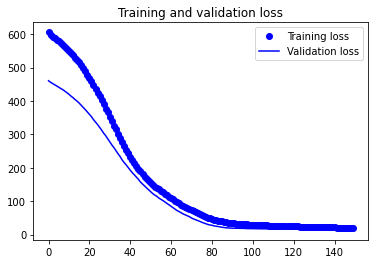

In [33]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()